In [35]:
# for numeric/scientific calculations
import numpy as np

# for data manipulation
import pandas as pd

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# for scaling/normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# for encoding
from sklearn.preprocessing import LabelEncoder

# for machine learning
from sklearn.model_selection import train_test_split
from sklearn import metrics #confusion_matrix,classification_report,mean_squared_error,mean_absolute_error

# for regression
from sklearn.linear_model import LinearRegression

#for Classification 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,SVR

#for Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

#for cross-validation
from sklearn.model_selection import KFold

#for ensemble 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# to ignore/not display warnings
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
#accuracy_score(x_test['class'],y_preds)
# For Ada boost model
#from xgboost import XGBClassifier

In [2]:
parkinson_df = pd.read_csv('parkinsons.data.csv')

In [3]:
parkinson_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
parkinson_df.shape

(195, 24)

In [5]:
parkinson_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [6]:
parkinson_df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


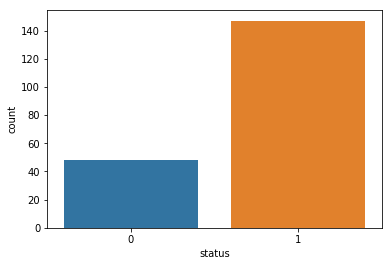

In [7]:
sns.countplot(parkinson_df['status'])

In [8]:
parkinson_df.drop_duplicates(inplace = True)

In [ ]:
parkinson_df.var()
#MDVP:Fo(Hz),MDVP:Fhi(Hz), MDVP:Flo(Hz),  

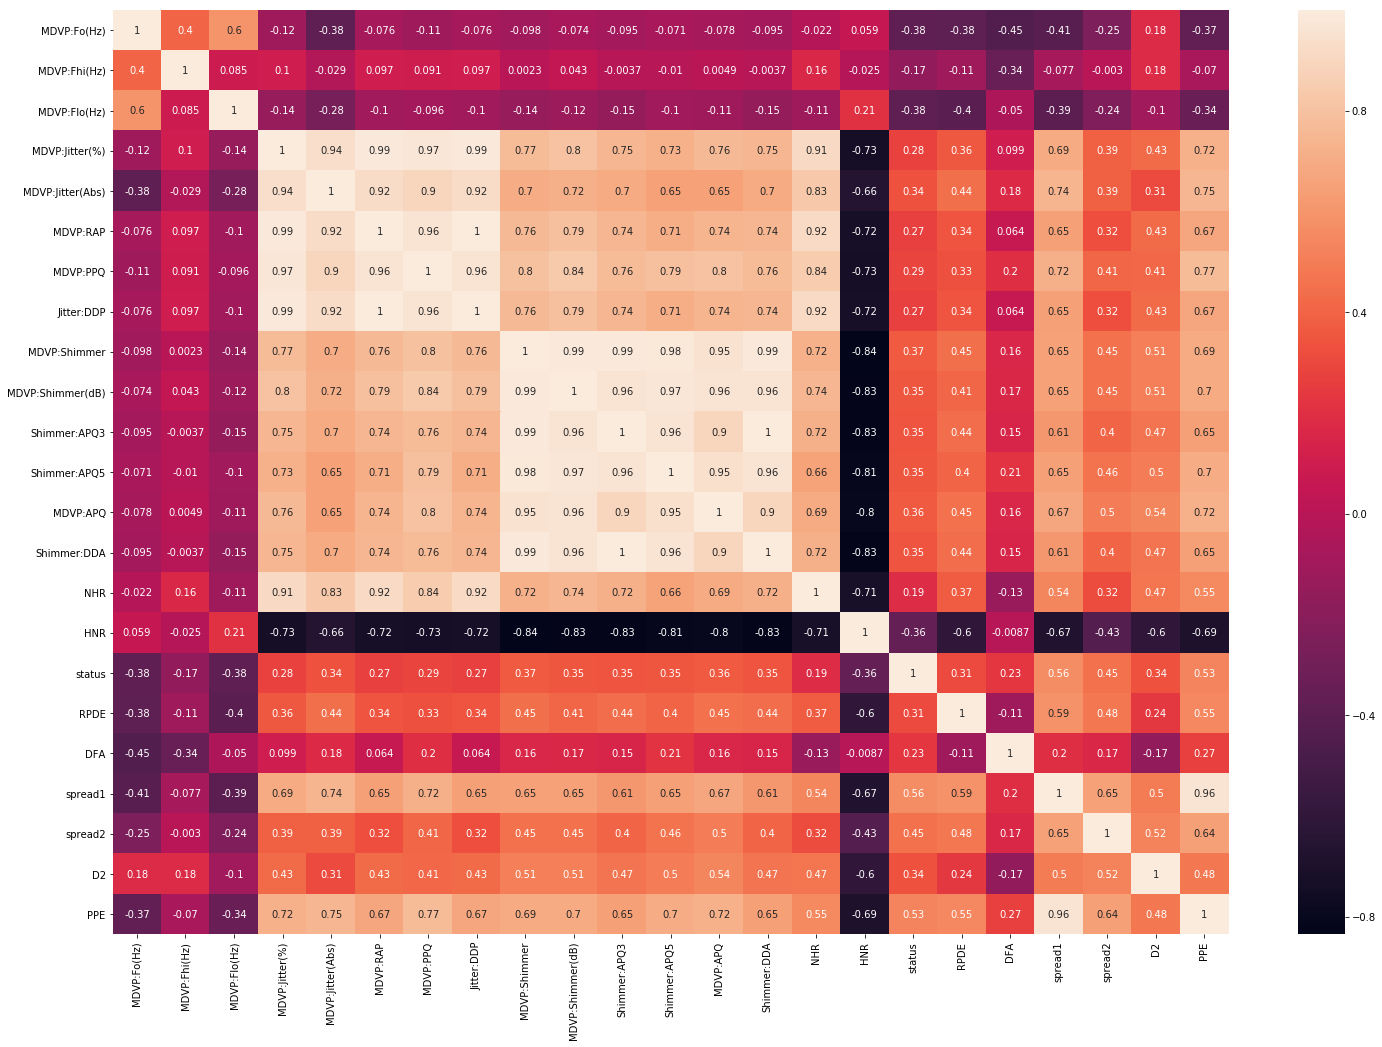

In [9]:
plt.figure(figsize=(25,17))
sns.heatmap(parkinson_df.corr(),annot = True)

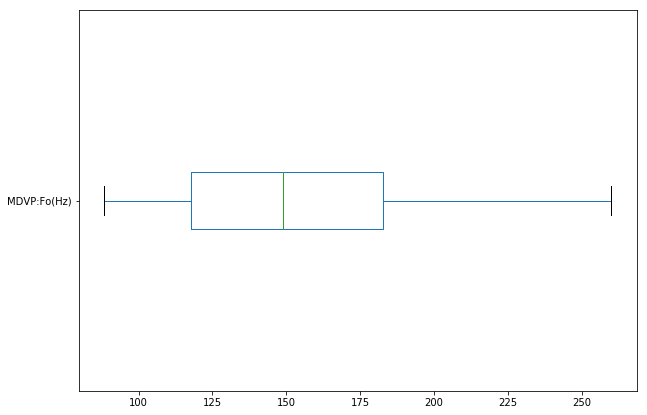

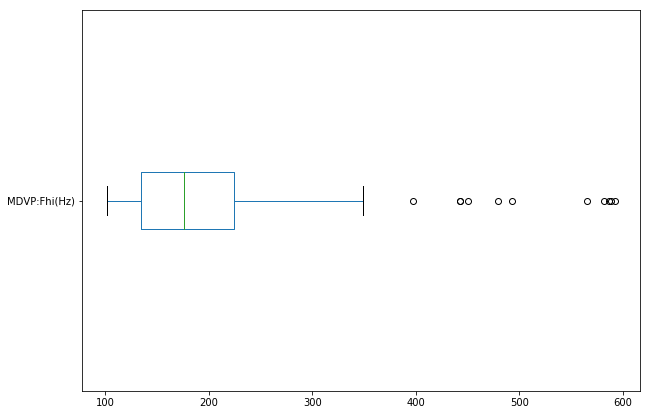

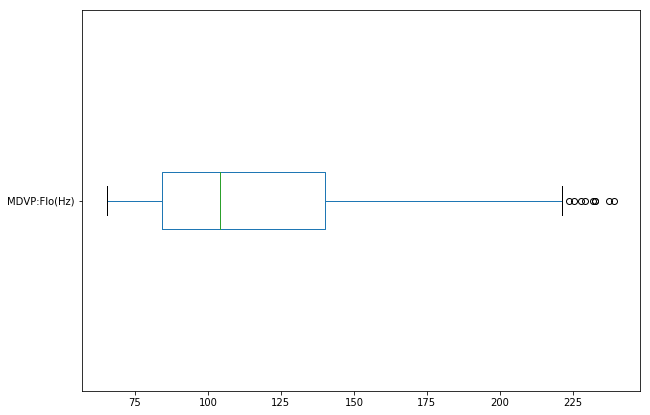

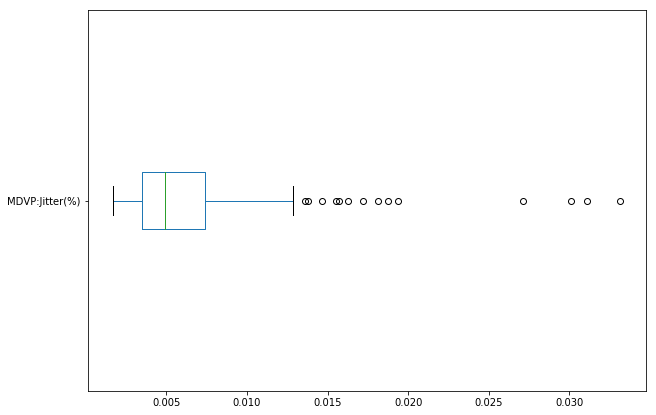

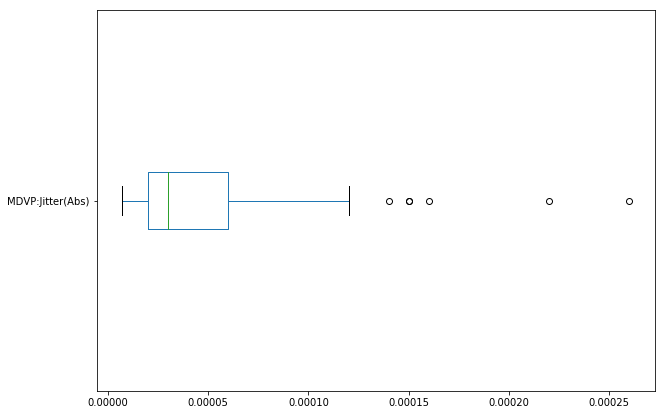

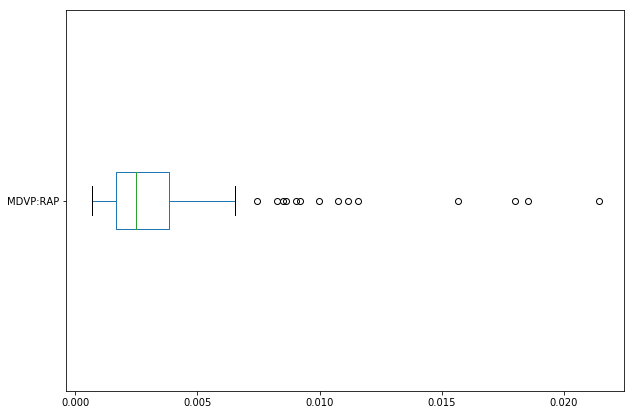

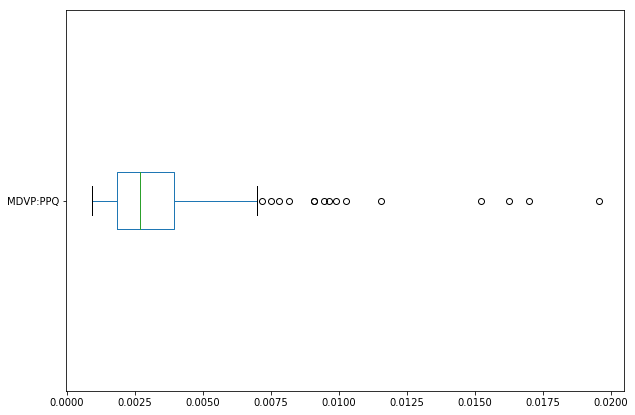

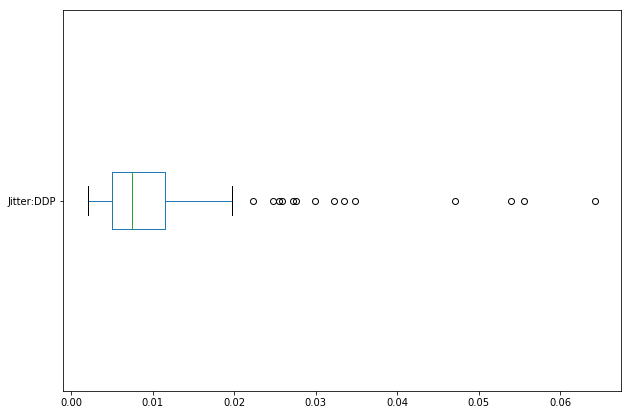

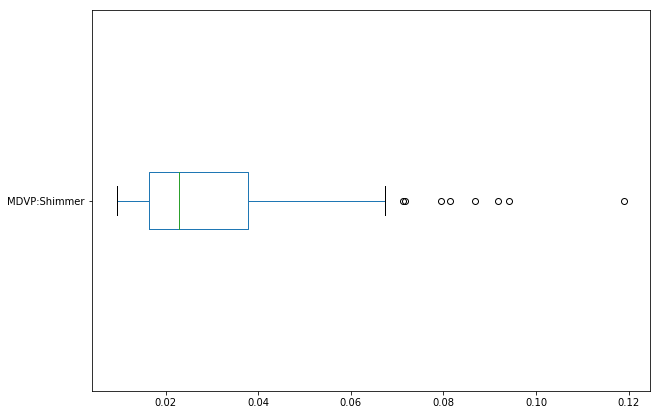

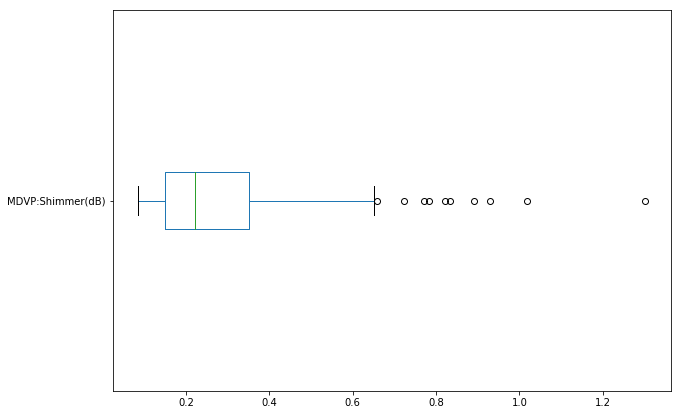

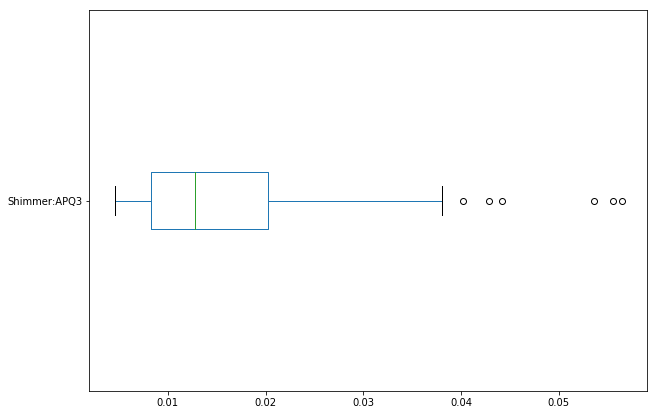

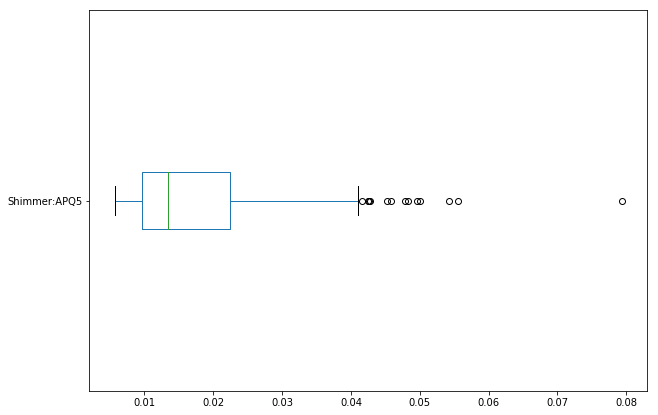

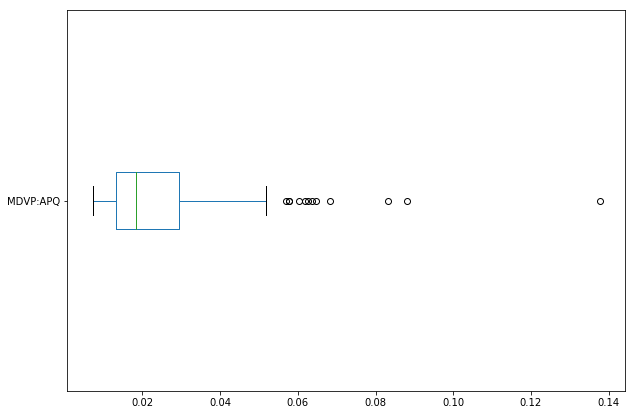

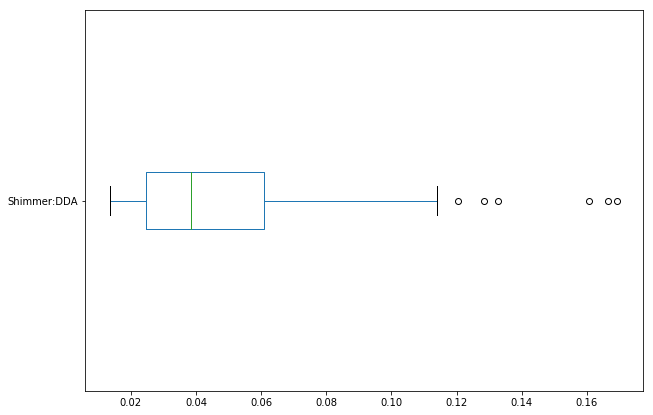

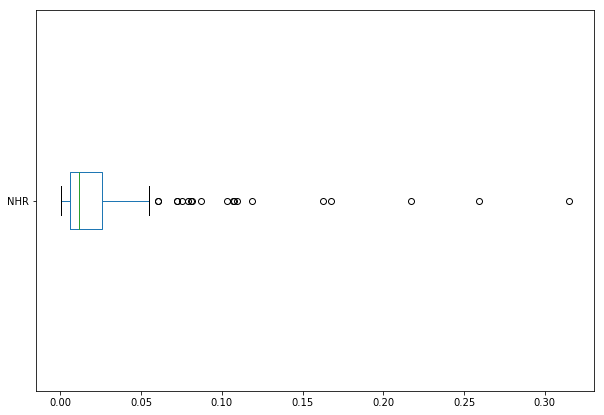

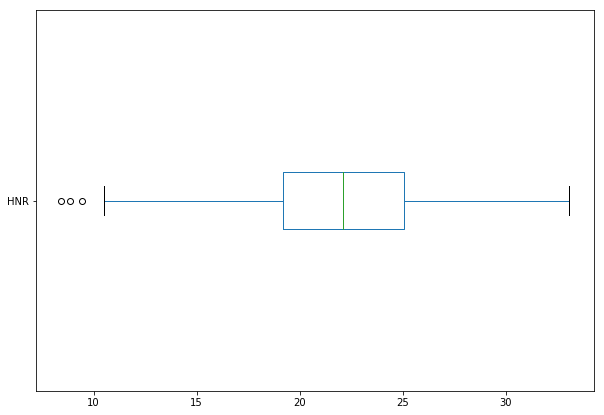

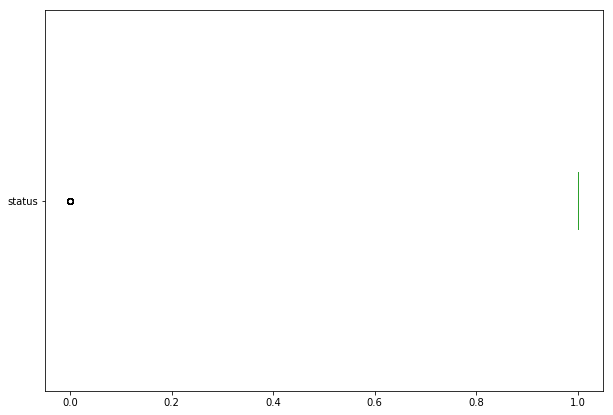

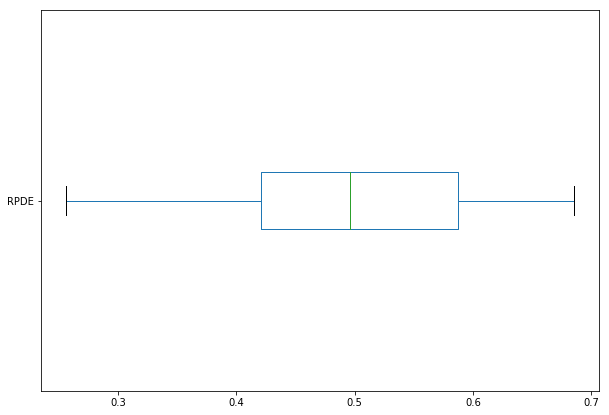

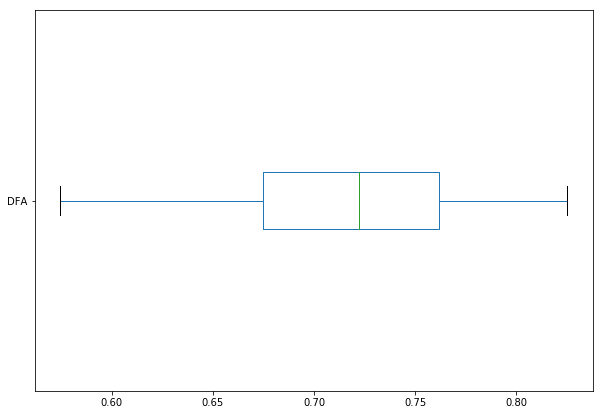

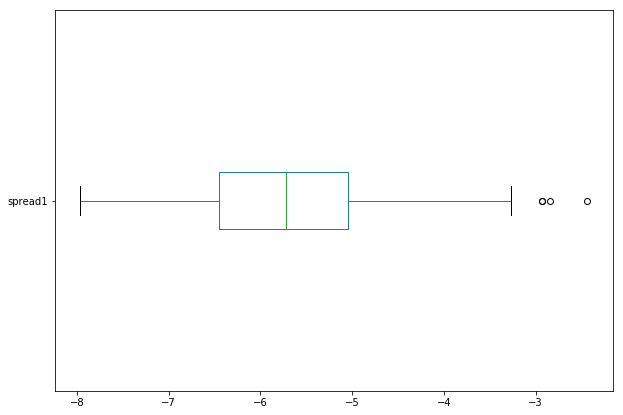

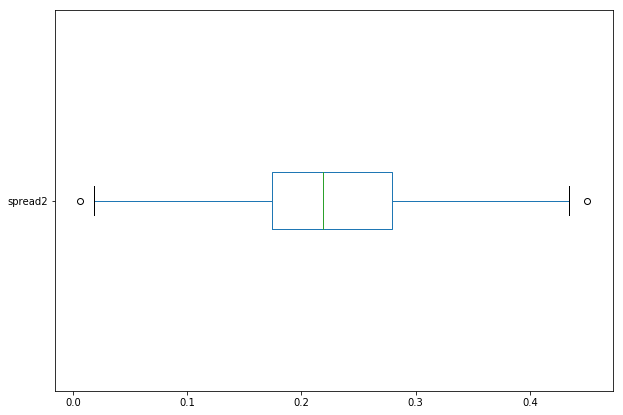

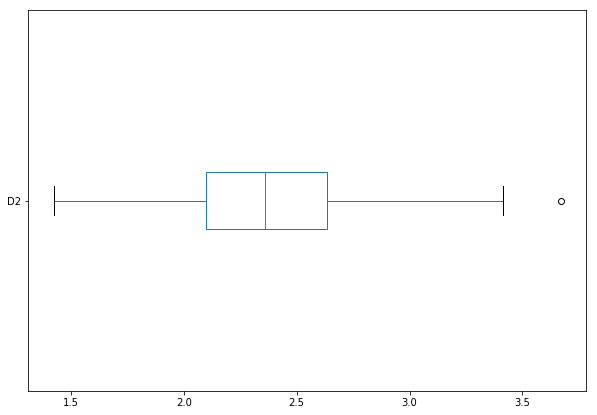

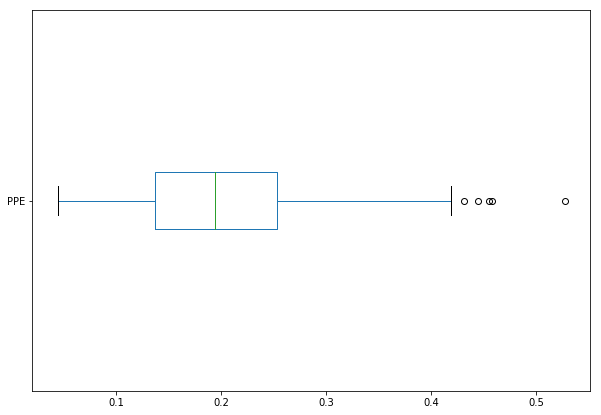

In [10]:
for col in parkinson_df:
    if parkinson_df[col].dtype in ['int64','float64']:
        plt.figure(figsize=(10,7))
        parkinson_df[col].plot(kind = 'box',vert = False)

In [11]:
parkinson_df = parkinson_df.drop('name',axis = 1)

In [12]:
parkinson_df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [13]:
features = parkinson_df.columns.drop('status')
target = 'status'
x_train,x_test,y_train,y_test = train_test_split(parkinson_df[features],parkinson_df[target],test_size = .2,random_state = 42)

In [14]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((156, 22), (39, 22), (156,), (39,))

In [15]:
lda = LDA(n_components=5)
x_train = lda.fit_transform(x_train,y_train)
x_test= lda.transform(x_test)

## Logistic Regression

In [43]:
Logistic_model = LogisticRegression(random_state=42)
Logistic_model.fit(x_train,y_train)
Log = Logistic_model.score(x_test,y_test)

## Decision Tree

In [44]:
Decision_model = DecisionTreeClassifier(random_state=42)
Decision_model.fit(x_train,y_train)
Des = Decision_model.score(x_test,y_test)

## K-NN

In [45]:
knn_model = KNeighborsClassifier(n_neighbors= 3)
knn_model.fit(x_train,y_train)
Knn = knn_model.score(x_test,y_test)

## Support Vector Machine

In [46]:
svc_model = SVC(kernel = 'rbf')
svc_model.fit(x_train,y_train)
svc_ = svc_model.score(x_test,y_test)

## Cross Validation

In [47]:
features = parkinson_df.columns.drop('status')
target = 'status'
X = parkinson_df[features]
y = parkinson_df[target]

In [48]:
kfold = KFold(n_splits= 5)

In [49]:
train_accuracy=[]
test_accuracy = []
for i,(train,test) in enumerate(kfold.split(X,y)):
    knn_model_cross = KNeighborsClassifier(n_neighbors=3)
    knn_model_cross.fit(X.iloc[train],y.iloc[train])
    train_accuracy.append(knn_model_cross.score(X.iloc[train],y.iloc[train]))
    test_accuracy.append(knn_model_cross.score(X.iloc[test],y.iloc[test]))
np.mean(train_accuracy),np.mean(test_accuracy)

(0.9307692307692308, 0.7025641025641025)

## Ensemble Method

### Random Forest 

In [50]:
random_forest_model = RandomForestClassifier(n_estimators= 10,min_samples_split= 10,min_impurity_decrease=0.05)
random_forest_model.fit(x_train,y_train)
rand = random_forest_model.score(x_test,y_test)

### Ada Boost

In [51]:
adaboost_model = AdaBoostClassifier(n_estimators= 10)
adaboost_model.fit(x_train,y_train)
ada = adaboost_model.score(x_test,y_test)

In [55]:
accuracy = pd.DataFrame({'Algorithm':['Logistic Regression','Desicion tree','K-Nearest neighbors','Support Vector Classifier','Random forest','Adaboost'],'Accu':[Log,Des,Knn,svc_,rand,ada]})

In [57]:
accuracy

,Algorithm,Accu
0,Logistic Regression,0.871795
1,Desicion tree,0.897436
2,K-Nearest neighbors,0.923077
3,Support Vector Classifier,0.846154
4,Random forest,0.897436
5,Adaboost,0.923077
